# Week 5 - Discovering Patterns: Clusters & Topics
Wanitchaya Poonpatanapricha

In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git


#All these packages need to be installed from pip
#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning, it
%matplotlib inline

import itertools
import json

## <span style="color:red">*Pitch Your Project*</span>

<span style="color:red">In the three cells immediately following, describe **WHAT** you are planning to analyze for your final project (i.e., texts, contexts and the social game, world and actors you intend to learn about through your analysis) (<200 words), **WHY** you are going to do it (i.e., why would theory and/or the average person benefit from knowing the results of your investigation) (<200 words), and **HOW** you plan to investigate it (i.e., what are the approaches and operations you plan to perform, in sequence, to yield this insight) (<400 words).


# ***What?*** 

Emoji, a form of ideograms, support computer-mediated communications (CMCs) in the same way nonverbal cues–such as facial expression, gesture, and tone of voice–support face-to-face (FTF) communications. According to prior literature on emoticons (the predecessor of emoji), one way that emoji can support CMCs is to convey politeness. Since some languages have richer linguistic elements for politeness (e.g., honorifics in Japanese, sentence-final particles in Thai) than the others (e.g., English), it is possible that when a speaker whose primary language has richer elements for politeness needs to communicate politely through texts in foreign language with less rich elements for politeness, the speaker may resort to emoji due to the lack of linguistic elements for politeness as well as nonverbal cues to convey politeness as in FTF. This paper investigates such possibility by studying speakers with various primary languages communicating in English within an online community. The specific hypotheses are: 

1. A speaker, regardless of one's primary language, is more likely to use emoji when communicates politely than when does not. (This hypothesis serves a purpose of replicating prior results on politeness function of emoticons on emoji.) 

2. A speaker whose primary language has richer elements for politeness is more likely to use emoji than a speaker whose primary language has less rich elements for politeness when communicates politely in English. 


## ***Why?***

A number of research have linked the use of emoticons–the predecessor of emoji–with politeness strategies. For example, Sampietro et al. (2016) proposed that one of the pragmatic function of emoticons was to mitigate possible face-threats. Skovholt (2014) found emoticons to be positive politeness markers and rapport building devices, and Vandergriff et al. (2013) found emoticons to be mostly used in the service of politeness and to mitigate disagreement. However it is unclear whether emoji also so serve politeness strategies.

In terms of cross-language analysis, prior works have studied emoticon usages for politeness across different languages. Komrskova (2015) studied emoticons in Czech and English, and found that phrases of greeting and thanks were very often accompanied by emoticons in both languages. Kavanagh (2016) studied emoticon as a medium for channeling politeness within American and Japanese online blogging communities and found that Japanese used emoticons significantly more than Americans. However, it is unclear if this is true for emoji and also when the speaker communicates in foreign language. In contrast to these works which investigated the use of emoticons for politeness in each speaker's primary language, this paper investigates the use of emoji for politeness in a speaker, regardless of the speaker's primary language, communicating in English.


## ***How?***

The goals of this paper are to replicate prior results on politeness function of emoticons on emoji and to investigate whether a speaker whose primary language has richer elements for politeness is more likely to use emoji than a speaker whose primary language less rich elements for politeness when communicates politely in English. To do so, an ideal dataset would be an English CMC that is a product of speakers with different primary languages where each speaker's primary language as well as the intention to communicate politely are explicitly coded.

In this paper, the next best ideal data is used because it is not feasible to conduct a controlled experiment. In particular, the ideal dataset is approximated from an English CMC where some speakers' preferred languages other than English are known. The intention to communicate politely is approximated from how polite the utterance is as well as whether that utterance is a direct mention to another speaker. Lastly, each language's degree of richness in polite elements is approximated from the politeness distinctions in pronouns feature from WALS.

In terms of statistical test, logistic regression is used in a binary classification task predicting whether an utterance contain any emoji. Independent variables that are inputs of the logistic regression are a speaker's primary language's degree of richness in polite elements, how polite the utterance is, and whether the utterance is a direct mention to another speaker. In addition, according to Guntuku (2019), there are some cultural differences in the use of emoji between the East and the West. Hence, a binary feature indicating whether the speaker's primary language is from the East or the West is used as a control variable in the logistic regression.


## <span style="color:red">*Pitch Your Sample*</span>

<span style="color:red">In the cell immediately following, describe the rationale behind your proposed sample design for your final project. What is the social game, social work, or social actors you about whom you are seeking to make inferences? What are its virtues with respect to your research questions? What are its limitations? What are alternatives? What would be a reasonable path to "scale up" your sample for further analysis (i.e., high-profile publication) beyond this class? (<300 words).


## ***Which (words)?***

1. The data of an English CMC was obtained from the official Discord server of Tsuki Adventure, a free-to-play mobile game. Discord is a proprietary freeware VoIP application and digital distribution platform designed for video gaming communities that specializes in text, image, video and audio communication between users in a chat. What is special about Tsuki Adventure Discord is that each user in the community is asked to tag the user profile with what language other than English the user prefers to communicate in. Although the preferred language tag is not mandatory, there is a significant number of the users in this community that do so. Hence, there is sufficient data to investigate the research questions. Nevertheless, using this data requires a strong assumption that the language tagged is the primary language of that user. If this assumption is not true, the results from testing the second hypothesis should be more conservative. Hence, this assumption should make it harder to get significant results. Also note that testing the first hypothesis doesn't require the user's primary language, while testing the second hypothesis requires one. Therefore, all utterances are used in testing the first hypothesis, while only utterances from users with language tags are used in testing the second hypothesis.    

2. Politeness distinctions in pronouns feature from WALS–The World Atlas of Language Structures–is used as a proxy for each language's degree of richness in polite elements. This feature has been used in some prior social science research. For example, Davis (2016) studied relationship between politeness distinctions and egalitarianism, and found that this politeness distinctions feature from WALS was more reliable than the others.  

3. Approximating an intention to communicate politely via an utterance's Polite Level and Direct Mention 
    * Polite Level - One way to approximate the intention to communicate politely is to see how polite the produced utterance is. In order to quantify such quality, a maximum entropy classifier–which is commonly used in several text classifications–predicting an utterance's polite level is trained from a human-annotated corpus created and used by Danescu et al. (2013). Danescu et al.'s (2013) corpus has more than 10,000 utterances annotated by humans via Amazon Mechanical Turk (AMT) and these utterances came from two large online communities: Wikipedia and Stack Exchange. According to Danescu et al. (2013), this corpus was thus far "the largest corpus with politeness annotations". Each utterance was labeled by five different annotators. 
    * Direct Mention - Since the polite level is measured automatically, there could be some cascading errors from the training corpus (which is the least likely given the reliability of the corpus), training the classifier, or applying the trained classifier on the current data. In addition, there could still be some aspect of politeness that the trained classifier fails to capture. Therefore, direct mention, which is defined as when an utterance contains Discord's mentioning users feature to mention the other user(s), is used as another proxy of an intention to communicate politely that does not suffer from possible cascading errors like the polite level does. The logic behind using direct mention as a proxy of an intention to communicate politely comes from Brown (1978)'s theory of politeness. The theory explains that all persons are concerned with their face and recognize that others also have face wants, and it is generally in everyone's interests to maintain each other's face. The risk of failing to maintain the other's face (or being not polite) is then highest when there is a particular other's face to maintain. That is if a user produces a not so polite utterance without directly mentioning any other user, it is less clear whose face is not maintained and hence it is less likely that any other user's face will not be maintained at all. On the other hand, if a user produces a not so polite utterance and directly mentions the other user(s), it is definite that the other user(s)'s face(s) will not be maintained. Hence, when there is a direct mention, the user should be more likely to communicate politely.



## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Construct cells immediately below this that construct features and cluster your documents using K-means and a variety of cluster numbers. Interrogate the cluster contents in terms of both documents and features. Identify the "optimal" cluster number with Silhouette analysis. Plot clusters and features after reducing with PCA. What does this cluster structure reveal about the organization of documents in your corpora? 

In [648]:
tsuki = pd.read_csv("tsuki_polite5.csv")[['language', 'text', 'polite_5', 
                                         'is_emoji']]

In [649]:
#First it needs to be initialized
ngCountVectorizer = sklearn.feature_extraction.text.CountVectorizer()
#Then trained
tsukiVects = ngCountVectorizer.fit_transform(tsuki['text'])

In [650]:
#initialize
tsukiTFTransformer = sklearn.feature_extraction.text.TfidfTransformer().fit(tsukiVects)
#train
tsukiTF = tsukiTFTransformer.transform(tsukiVects)

In [651]:
#initialize
ngTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, stop_words='english', norm='l2')
#train
tsukiTFVects = ngTFVectorizer.fit_transform(tsuki['text'])

# Flat Clustering with $K$-means

In [198]:
numClusters = 3

In [652]:
km = sklearn.cluster.KMeans(n_clusters=numClusters, init='k-means++')

In [653]:
km.fit(tsukiTFVects)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [654]:
tsuki['kmeans_predictions'] = km.labels_
tsuki

,language,text,polite_5,is_emoji,kmeans_predictions
0,en,i still have tons of moonpies and halloween fo...,2,False,1
1,en,i go to the forest to see how much i have beca...,2,False,1
2,cn,hahahaha,4,False,1
3,es,hahahaha,4,False,1
4,pt,hahahaha,4,False,1
...,...,...,...,...,...
4482,en,Tsuki fishing up the mayor's dead grandaughter...,0,False,1
4483,ph,-tsuki’s festive scarf/holiday scarf,2,False,1
4484,ph,-snowball fight w friends -snowman making duri...,1,True,1
4485,en,<user_mention> it worked! Thanks again!,4,True,1


In [655]:
terms = ngTFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(numClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 welcome
 bunnies
 new
 hello
 lol
 yall
 haha
 thank
 snow
 saying


Cluster 1:
 user_mention
 tsuki
 oh
 thanks
 just
 game
 thank
 like
 lol
 time


Cluster 2:
 yori_loves_chi
 652933152024821821
 yup
 forest
 fixed
 flag
 floor
 flying
 food
 forgot




Seems like the topic 0 is greeting related text. Topic 1 seems to be direct mention text. Topic 2 seems to be general content about the game.

In [203]:
PCA = sklearn.decomposition.PCA
pca = PCA(n_components = 2).fit(tsukiTFVects.toarray())
reduced_data = pca.transform(tsukiTFVects.toarray())

In [204]:
components = pca.components_
keyword_ids = list(set(order_centroids[:,:10].flatten())) #Get the ids of the most distinguishing words(features) from your kmeans model.
words = [terms[i] for i in keyword_ids]#Turn the ids into words.
x = components[:,keyword_ids][0,:] #Find the coordinates of those words in your biplot.
y = components[:,keyword_ids][1,:]

In [205]:
colordict = {
0: 'red',
1: 'green',
2: 'blue'}
colors = [colordict[c] for c in tsuki['kmeans_predictions']]

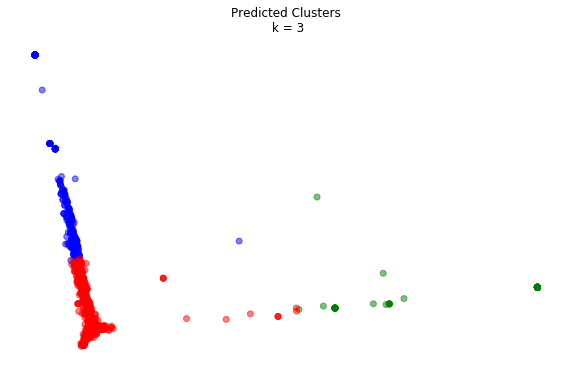

In [206]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], color = colors, alpha = 0.5)
plt.xticks(())
plt.yticks(())
plt.title('Predicted Clusters\n k = 3')
plt.show()

So seems like most texts are either topic 0 (red) or topic 2 (blue). There aren't many topic 1 (green). 

# Selecting Cluster Number

In [182]:
def plotSilhouette(n_clusters, X):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,5))
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = matplotlib.cm.get_cmap("nipy_spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = matplotlib.cm.get_cmap("nipy_spectral")
    colors = cmap(float(i) / n_clusters)
    ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    projected_centers = pca.transform(centers)
    # Draw white circles at cluster centers
    ax2.scatter(projected_centers[:, 0], projected_centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(projected_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC 1")
    ax2.set_ylabel("PC 2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()
    print("For n_clusters = {}, The average silhouette_score is : {:.3f}".format(n_clusters, silhouette_avg))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


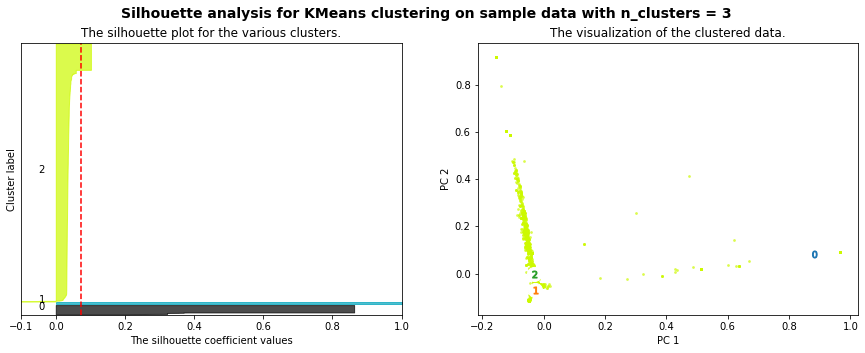

For n_clusters = 3, The average silhouette_score is : 0.074


In [183]:
X = tsukiTFVects.toarray()
plotSilhouette(3, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


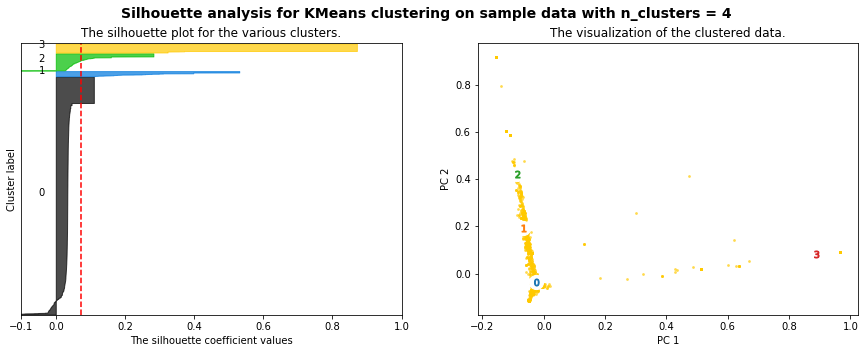

For n_clusters = 4, The average silhouette_score is : 0.072


In [184]:
X = tsukiTFVects.toarray()
plotSilhouette(4, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


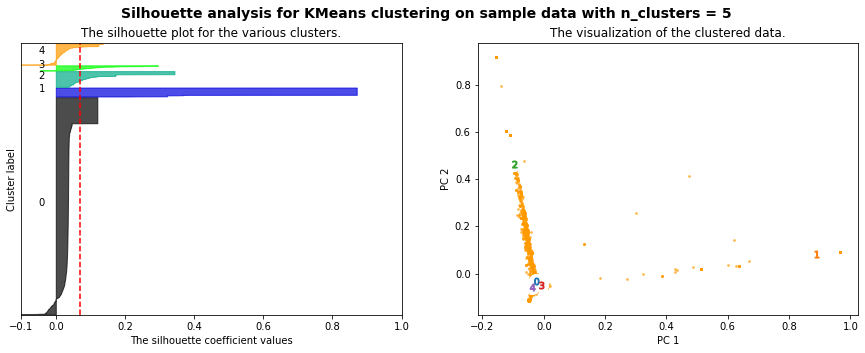

For n_clusters = 5, The average silhouette_score is : 0.071


In [185]:
X = tsukiTFVects.toarray()
plotSilhouette(5, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


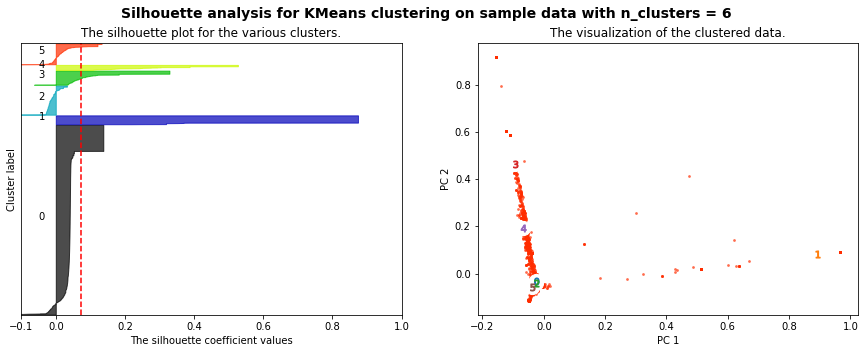

For n_clusters = 6, The average silhouette_score is : 0.073


In [186]:
X = tsukiTFVects.toarray()
plotSilhouette(6, X)

k = 3 has the biggest silhouette, so the choice of k = 3 before is already appropriate!

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">Construct cells immediately below this that hierarchically cluster your documents using two approaches, and visualize them with a tree. Interrogate the recursive cluster contents in terms of both documents and closenesses. What does this nested cluster structure reveal about the organization of documents in your sampled corpora? Moreover, if they do worse than kmeans (as above), why do you think this is the case (hint: using metrics if you have ground truth or silhouette if you do not)? 

<span style="color:red">***Stretch***: Attempt using different distances into your clustering algorithms. (How) do they change the arrangement of clusters?

# Hierarchical Clustering with Wald's Method

In [656]:
tsukiCoocMat = tsukiTFVects * tsukiTFVects.T
#set the diagonal to 0 since we don't care how similar texts are to themselves
tsukiCoocMat.setdiag(0)
#Another way of relating the texts is with their cosine similarity
#newsgroupsCosinMat1 = 1 - sklearn.metrics.pairwise.cosine_similarity(newsgroupsTFVects)
#But generally word occurrence is more accurate


/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [657]:
selectIndices = []
indexToCat = []
for c in set(tsuki['kmeans_predictions']):
    selectIndices += list(tsuki[tsuki['kmeans_predictions'] == c].index)[:50]
    indexToCat += [c] * 50
    #.groupby('category').sum()

In [658]:
subCoocMat = tsukiCoocMat[selectIndices,:][:,selectIndices]

### Ward

In [659]:
linkage_matrix = scipy.cluster.hierarchy.ward(subCoocMat.toarray())

/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


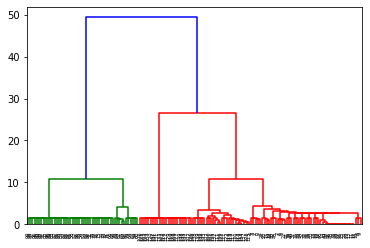

In [211]:
dendDat = scipy.cluster.hierarchy.dendrogram(linkage_matrix, get_leaves=True)

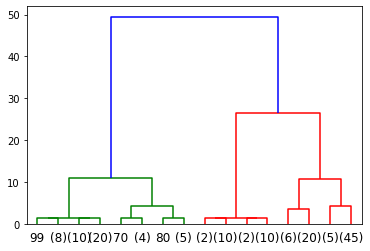

In [214]:
dendrogramDat = scipy.cluster.hierarchy.dendrogram(linkage_matrix, p=3, truncate_mode='level', get_leaves=True)

### Stretch: Centroid

In [662]:
linkage_matrix = scipy.cluster.hierarchy.centroid(subCoocMat.toarray())

/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/scipy/cluster/hierarchy.py:629: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='centroid', metric='euclidean')


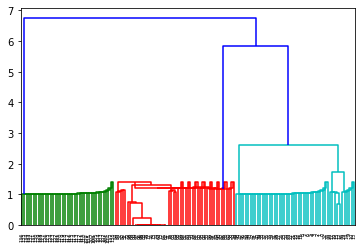

In [663]:
dendDat = scipy.cluster.hierarchy.dendrogram(linkage_matrix, get_leaves=True)

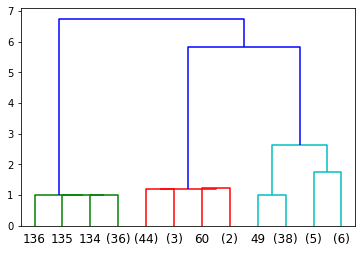

In [664]:
dendrogramDat = scipy.cluster.hierarchy.dendrogram(linkage_matrix, p=3, truncate_mode='level', get_leaves=True)

Using `centroid` instead of `ward` as the linkage change the result a lot. In `ward`, there seems to be more hierachical structures. On the other hand, `centroid`'s result seems to be flatter. `centroid`'s result seems to suggest 3 clear clusters while `ward`'s result seems to suggest 3 clear clusters.

In [661]:
linkage_matrix_full = scipy.cluster.hierarchy.ward(tsukiCoocMat.toarray())
hierarchicalClusters_full = scipy.cluster.hierarchy.fcluster(linkage_matrix_full, 3, 'maxclust')

In [218]:
tsuki['wald_predictions'] = hierarchicalClusters_full
tsuki

,language,text,polite_5,is_emoji,kmeans_predictions,wald_predictions
0,en,i still have tons of moonpies and halloween fo...,2,False,0,2
1,en,i go to the forest to see how much i have beca...,2,False,0,2
2,cn,hahahaha,4,False,0,2
3,es,hahahaha,4,False,0,2
4,pt,hahahaha,4,False,0,2
...,...,...,...,...,...,...
4482,en,Tsuki fishing up the mayor's dead grandaughter...,0,False,0,2
4483,ph,-tsuki’s festive scarf/holiday scarf,2,False,0,2
4484,ph,-snowball fight w friends -snowman making duri...,1,True,0,2
4485,en,<user_mention> it worked! Thanks again!,4,True,2,3


From the quick glance above, hierarchical clusters seems to pick on the same clusters as kmean!

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">Construct cells immediately below this that topic model documents related to your anticipated final project. Interrogate and visually plot (e.g., as a bar graph?) the topic-word loadings and the document-topic loadings. What does this topic structure reveal about the distribution of contents across your documents? Systematically vary the $\alpha$, $\eta$, and topic number of the model for your text and describe in detail whether and how these changes led to distinctive outcomes, visible to you as analyst.  

<span style="color:red">**Stretch**: Cluster your documents, but instead of using words alone, use their topic loadings as an additional set of features. Do these topic loadings increase the apparent semantic coherence of your clusters?</span> 

# Gensim

In [219]:
#Apply our functions
tsuki['tokenized_text'] = tsuki['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
tsuki['normalized_tokens'] = tsuki['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [221]:
def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]

tsuki['reduced_tokens'] = tsuki['normalized_tokens'].apply(lambda x: dropMissing(x, senTFVectorizer.vocabulary_.keys()))

In [222]:
dictionary = gensim.corpora.Dictionary(tsuki['reduced_tokens'])

In [223]:
corpus = [dictionary.doc2bow(text) for text in tsuki['reduced_tokens']]

In [252]:
tsukilda = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, alpha='auto', eta='auto')

We can inspect the degree to which distinct texts load on different topics. Here is one of the texts from the training set:

In [253]:
tsuki1Bow = dictionary.doc2bow(tsuki['reduced_tokens'][0])
tsuki1lda = senlda[sen1Bow]
print("The topics of the text: {}".format(tsuki['text'][0]))
print("are: {}".format(tsuki1lda))

The topics of the text: i still have tons of moonpies and halloween food hahahaha 
are: [(0, 0.10656131), (2, 0.20886005), (3, 0.031278964), (4, 0.23412706), (5, 0.2639899), (7, 0.04616471), (8, 0.102114744)]


In [254]:
ldaDF = pandas.DataFrame({
        'text' : tsuki['text'],
        'topics' : [tsukilda[dictionary.doc2bow(l)] for l in tsuki['reduced_tokens']]
    })

In [255]:
#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(tsukilda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(tsukilda.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

ldaDF[1::100]

,text,topics,topic_0,topic_1,topic_2,topic_3,topic_4
1,i go to the forest to see how much i have beca...,"[(0, 0.099846005), (1, 0.10140792), (2, 0.0945...",0.099846,0.101408,0.094518,0.610112,0.094116
101,it's okay just teach him he will know what is ...,"[(0, 0.0662975), (1, 0.067332834), (2, 0.06305...",0.066298,0.067333,0.063053,0.738916,0.064401
201,welcomee,"[(0, 0.20227426), (1, 0.20544878), (2, 0.19148...",0.202274,0.205449,0.191487,0.210124,0.190667
301,all the food that you are saving they would eat,"[(0, 0.80251205), (1, 0.050356776), (2, 0.0469...",0.802512,0.050357,0.046982,0.053085,0.047065
401,yay,"[(0, 0.20227426), (1, 0.20544878), (2, 0.19148...",0.202274,0.205449,0.191487,0.210124,0.190667
501,HAPPY NEW YEAR BUNNIES!!,"[(0, 0.60582304), (1, 0.101614974), (2, 0.0945...",0.605823,0.101615,0.094527,0.103950,0.094085
601,Hi!!,"[(0, 0.20227426), (1, 0.20544878), (2, 0.19148...",0.202274,0.205449,0.191487,0.210124,0.190667
701,Hello,"[(0, 0.20227426), (1, 0.20544878), (2, 0.19148...",0.202274,0.205449,0.191487,0.210124,0.190667
801,Update,"[(0, 0.605261), (1, 0.101526186), (2, 0.094486...",0.605261,0.101526,0.094487,0.103837,0.094889
901,Hello everyone,"[(0, 0.20227426), (1, 0.20544878), (2, 0.19148...",0.202274,0.205449,0.191487,0.210124,0.190667


We can clearly see that the longer the text it, the more certain LDA assigns that text to a particular topic. In contrast, when there is only one word in the text, LDA can't really pinpoint which topic should be the highest. We can see that in that case, LDA assign ~0.20 across 5 topics. Seems like my data is not really suitable for topic modelling since a lot of texts are short.

In [665]:
ldaDFV = ldaDF[-10:][['topic_%d' %x for x in range(5)]]
ldaDFVisN = ldaDF[-10:][['text']]
ldaDFVis = ldaDFV.as_matrix(columns=None)
ldaDFVisNames = ldaDFVisN.as_matrix(columns=None)

Below are 10 texts I am going to visualize:

In [258]:
i = 1
for text in ldaDFVisNames:
    print(i, ": ", text[0])
    i+= 1

1 :  Weiwei’s idea is actually good. An update on Ed storyline as well 
2 :  <user_mention> this is a totally new story! Cool! 
3 :  <user_mention> Ooo. I love the scarf idea! Hehe 
4 :  And she reveals the killer. Her own father 
5 :  Wow Wei Wei idea is splendid !! ★Maybe meanwhile TSUKI goes fishing in Yukiyama maybe catching the bones or skull like or something from the DAUGHTER's Corpse . ★ Maybe Mayor's daughters corpse turning into a ghost ..that will be awesome ...New ghost at yukiyama !! 
6 :  Tsuki fishing up the mayor's dead grandaughter's corpse.. 
7 :  -tsuki’s festive scarf/holiday scarf 
8 :  -snowball fight w friends -snowman making during xmas -diary entry for snowball fight and snow angel ️ 
9 :  <user_mention> it worked! Thanks again! 
10 :  Oh wow thank you! I’ll try now! 


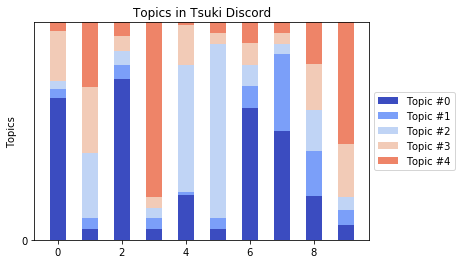

In [265]:
N = 10
ind = np.arange(N)
K = tsukilda.num_topics  # N documents, K topics
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Tsuki Discord')
#plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

We can see the same pattern, the 9th text is short relative to the other 9 texts. Hence, it is one with the most unclear dominant topic.

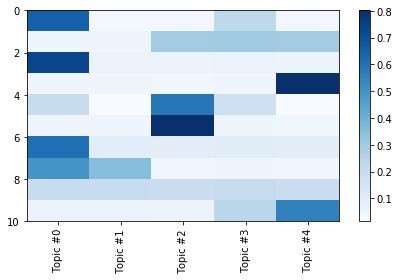

In [266]:
plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
#plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()

In [267]:
topicsDict = {}
for topicNum in range(tsukilda.num_topics):
    topicWords = [w for w, p in tsukilda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4
0,yes,random,cool,okay,oh
1,game,phone,visit,try,think
2,play,trigger,city,gas,wait
3,check,entry,fish,ed,thing
4,love,nice,maybe,eat,heart
5,food,christmas,hour,station,red
6,update,sign,happen,code,answer
7,friend,village,car,late,save
8,save,happen,welcome,club,buy
9,idea,event,option,stay,click


<Figure size 432x288 with 0 Axes>

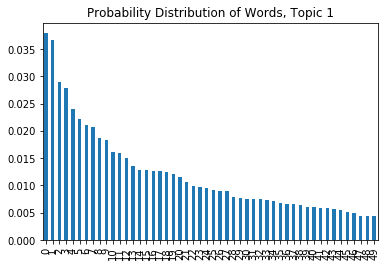

In [268]:
topic1_df = pandas.DataFrame(tsukilda.show_topic(1, topn=50))
plt.figure()
topic1_df.plot.bar(legend = False)
plt.title('Probability Distribution of Words, Topic 1')
plt.show()

In [269]:
tsukilda1 = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, eta = 0.00001)
tsukilda2 = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, eta = 0.9)

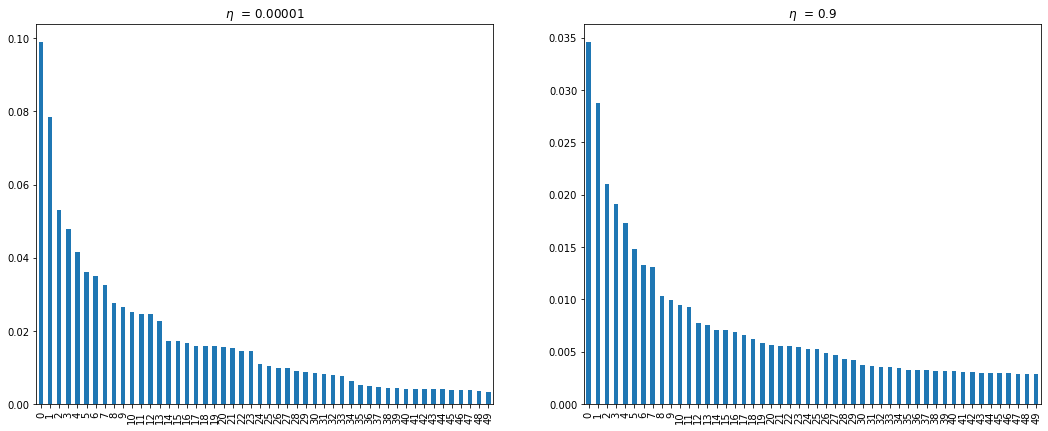

In [251]:
topic11_df = pandas.DataFrame(tsukilda1.show_topic(1, topn=50))
topic21_df = pandas.DataFrame(tsukilda2.show_topic(1, topn=50))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
topic11_df.plot.bar(legend = False, ax = ax1, title = '$\eta$  = 0.00001')
topic21_df.plot.bar(legend = False, ax = ax2, title = '$\eta$  = 0.9')
plt.show()

### $\eta$ = 0.00001

In [667]:
topicsDict = {}
for topicNum in range(tsukilda1.num_topics):
    topicWords = [w for w, p in tsukilda1.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4
0,phone,random,code,happen,okay
1,game,trigger,hour,try,oh
2,entry,christmas,save,maybe,yes
3,play,idea,fish,option,cool
4,visit,welcome,check,car,buy
5,thing,morning,answer,nice,gas
6,club,village,story,heart,sign
7,moon,post,ghost,eat,mean
8,city,wait,character,play,late
9,old,friend,wish,city,ed


The words seem to be more specific than the default $\eta$. For example, we can see `club moon` which is a specific location in the game.

### $\eta$ = 0.9

In [668]:
topicsDict = {}
for topicNum in range(tsukilda2.num_topics):
    topicWords = [w for w, p in tsukilda2.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4
0,ed,random,okay,think,phone
1,eat,yes,oh,heart,try
2,mean,nice,entry,gas,maybe
3,swing,fish,happen,gift,game
4,play,cool,christmas,option,trigger
5,answer,welcome,buy,red,play
6,probably,check,wait,notification,yes
7,sad,club,visit,sorry,hour
8,correct,event,late,ask,food
9,hungry,moon,city,station,car


Seems like topics are ordered differently from when $\eta$ = 0.00001. It also seems to prioritize different words. Still, the overall content of the topics seem to remain unchange.

### Stretch

In [572]:
#First it needs to be initialized
ngCountVectorizer = sklearn.feature_extraction.text.CountVectorizer()
#Then trained
tsukiVects = ngCountVectorizer.fit_transform(ldaDF['text'])

In [573]:
#initialize
tsukiTFTransformer = sklearn.feature_extraction.text.TfidfTransformer().fit(tsukiVects)
#train
tsukiTF = tsukiTFTransformer.transform(tsukiVects)

In [636]:
#initialize
ngTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, stop_words='english', norm='l2')
#train
tsukiTFVects = ngTFVectorizer.fit_transform(ldaDF['text'])

In [637]:
import scipy.sparse as sparse

In [638]:
tsukiTFVects = sparse.hstack((tsukiTFVects,np.array(ldaDF['topic_0'])[:,None]))
tsukiTFVects = sparse.hstack((tsukiTFVects,np.array(ldaDF['topic_1'])[:,None]))
tsukiTFVects = sparse.hstack((tsukiTFVects,np.array(ldaDF['topic_2'])[:,None]))
tsukiTFVects = sparse.hstack((tsukiTFVects,np.array(ldaDF['topic_3'])[:,None]))
tsukiTFVects = sparse.hstack((tsukiTFVects,np.array(ldaDF['topic_4'])[:,None]))

In [639]:
numClusters = 3

In [640]:
km = sklearn.cluster.KMeans(n_clusters=numClusters, init='k-means++')

In [641]:
km.fit(tsukiTFVects)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [642]:
ldaDF['kmeans_predictions'] = km.labels_
ldaDF

,text,topics,topic_0,topic_1,topic_2,topic_3,topic_4,kmeans_predictions
0,i still have tons of moonpies and halloween fo...,"[(0, 0.33184466), (1, 0.067290045), (2, 0.0627...",0.331845,0.067290,0.062717,0.068822,0.469327,1
1,i go to the forest to see how much i have beca...,"[(0, 0.099846005), (1, 0.10140792), (2, 0.0945...",0.099846,0.101408,0.094518,0.610112,0.094116,1
2,hahahaha,"[(0, 0.20227426), (1, 0.20544878), (2, 0.19148...",0.202274,0.205449,0.191487,0.210124,0.190667,1
3,hahahaha,"[(0, 0.20227426), (1, 0.20544878), (2, 0.19148...",0.202274,0.205449,0.191487,0.210124,0.190667,1
4,hahahaha,"[(0, 0.20227426), (1, 0.20544878), (2, 0.19148...",0.202274,0.205449,0.191487,0.210124,0.190667,1
...,...,...,...,...,...,...,...,...
4482,Tsuki fishing up the mayor's dead grandaughter...,"[(0, 0.049655337), (1, 0.050357085), (2, 0.801...",0.049655,0.050357,0.801679,0.051539,0.046770,0
4483,-tsuki’s festive scarf/holiday scarf,"[(0, 0.6060883), (1, 0.10137825), (2, 0.094488...",0.606088,0.101378,0.094489,0.103960,0.094084,2
4484,-snowball fight w friends -snowman making duri...,"[(0, 0.5001584), (1, 0.35412726), (2, 0.046949...",0.500158,0.354127,0.046949,0.051873,0.046892,2
4485,<user_mention> it worked! Thanks again!,"[(0, 0.20227426), (1, 0.20544878), (2, 0.19148...",0.202274,0.205449,0.191487,0.210124,0.190667,1


In [643]:
PCA = sklearn.decomposition.PCA
pca = PCA(n_components = 2).fit(tsukiTFVects.toarray())
reduced_data = pca.transform(tsukiTFVects.toarray())

In [644]:
components = pca.components_
keyword_ids = list(set(order_centroids[:,:10].flatten())) #Get the ids of the most distinguishing words(features) from your kmeans model.
#words = [terms[i] for i in keyword_ids]#Turn the ids into words.
x = components[:,keyword_ids][0,:] #Find the coordinates of those words in your biplot.
y = components[:,keyword_ids][1,:]

In [645]:
colordict = {
0: 'red',
1: 'green',
2: 'blue'}
colors = [colordict[c] for c in ldaDF['kmeans_predictions']]

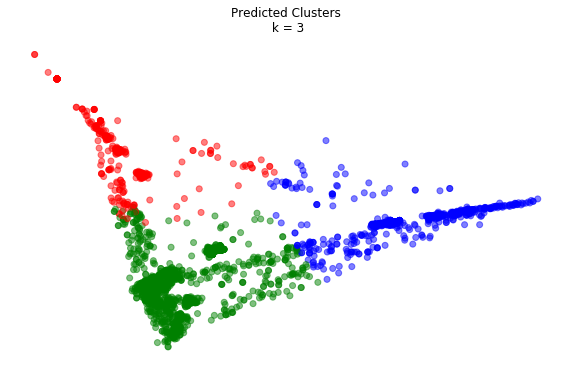

In [646]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], color = colors, alpha = 0.5)
plt.xticks(())
plt.yticks(())
plt.title('Predicted Clusters\n k = 3')
plt.show()

Adding LDA's topics as other input features to kmeans seem to make the cluster more balanced. Before, texts are heavily assigned to 2 clusters while the other cluster is left quite empty. The new clusters seem to contain equal number of texts. This could both bad and good depend on the goal of the analysis.



## <span style="color:red">*Exercise 4*</span>

<span style="color:red">Construct cells immediately below this that use topic models and networks, or dynamic topic models on datasets relevant to your final project. You can also extend the analysis of the COHA or Soap datasets, if relevant to the comparison of data for your projects. (You could possibly use coha_genres dictionary to conduct analysis on topic evolution for a particular genre? What themes do you see evolving throughout these corpora?)

## Dynamic Topic Modelling

In [270]:
corpora_address = "COHA"

In [271]:
coha_texts = lucem_illud_2020.loadDavies(corpora_address, return_raw=True)

text_1810s_kso.zip
text_1820s_jsi.zip
text_1830s_bsu.zip
text_1840s_nsq.zip
text_1850s_jpr.zip
text_1860s_psi.zip
text_1870s_vuy.zip
text_1880s_azz.zip
text_1890s_jsq.zip
text_1900s_mse.zip
text_1910s_jue.zip
text_1920s_gte.zip
text_1930s_bie.zip
text_1940s_bsw.zip
text_1950s_ndz.zip
text_1960s_xus.zip
text_1970s_jfy.zip
text_1980s_bkk.zip
text_1990s_bsj.zip
text_2000s_scc.zip


I choose to analyze only non-fiction corpus.

In [476]:
coha_nf_years = {}

In [478]:
for article in coha_texts:
    genre, year, id_ = article.split("_")
    if genre == "nf":
        if year not in coha_nf_years:
            coha_nf_years[year] = []
        if year in coha_nf_years:
            coha_nf_years[year].append(coha_texts[article])

In [479]:
import collections

In [480]:
years = []
year_lens = []

In [481]:
for year_info in collections.OrderedDict(sorted(coha_nf_years.items())):
    years.append(year_info)
    year_lens.append(len((coha_nf_years[year_info])))

In [482]:
years[0], years[-1]

('1815', '2009')

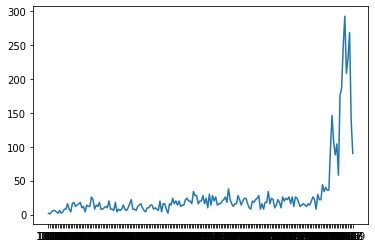

In [483]:
import matplotlib.pyplot as plt
plt.plot(years, year_lens)

There aren't that many non-fiction in COHA (in comparison to other genres). The distribution over time seems to be similar to other genres.

In [484]:
nf_texts_coha = []
docs_per_year = [0, 0, 0, 0, 0]
i = 0

I divide the timeslice into before 1903, 1903 - 1940, 1940 - 1980, 1980 - 2000, and after 2000.

In [485]:
for year_info in collections.OrderedDict(sorted(coha_nf_years.items())):
    large_files = 0
    for article in coha_nf_years[year_info]:
        try:
            if len(article[2]) < 1000000:
                fic_texts_coha.append(lucem_illud_2020.normalizeTokens(article[2].decode("utf-8")))
            if len(article[2]) >= 1000000:
                large_files += 1
        except IndexError:
            continue
    # these numbers are the number of years in the 
    if i < 103:
        docs_per_year[0] += len(coha_nf_years[year_info]) - large_files
    elif i >= 103 and i < 140:
        docs_per_year[1] += len(coha_nf_years[year_info]) - large_files
    elif i >= 140 and i < 180:
        docs_per_year[2] += len(coha_nf_years[year_info]) - large_files
    elif i >= 180 and i < 200:
        docs_per_year[3] += len(coha_nf_years[year_info]) - large_files
    elif i >= 200:
        docs_per_year[4] += len(coha_nf_years[year_info]) - large_files
    i += 1

In [486]:
pd.DataFrame(docs_per_year)

,0
0,1309
1,722
2,1144
3,2086
4,0


Since there is no observation in the 4th timeslice, I remove that timeslice away and only use 4 timeslices in total.

In [494]:
docs_per_year = docs_per_year[:-1]

#### Smaller Corpora

In [505]:
def choose_n(corpus, time_slices, nums=100):
    new_corpus = []
    time = 0
    for time_slice in time_slices:
        new_corpus += corpus[time:time+nums]
        time += time_slice
    return new_corpus

In [506]:
def split_up(document, doc_size=1000):
    new_docs = [document[i:i + doc_size] for i in range(0, len(document), doc_size)]
    return(new_docs, len(new_docs))

In [507]:
small_corpus = choose_n(fic_texts_coha, docs_per_year, nums=50)

I only choose 50 texts per timeslice since my laptop is not very fast :(

In [509]:
final_corpus= []

In [510]:
docs_per_time_slice = [0, 0, 0, 0]

In [511]:
for i, article in enumerate(small_corpus):
    # identify time slice based on article number 
    if i < 50:
        time = 0
    elif i > 50 and i <= 100:
        time = 1
    elif i > 100 and i <= 150:
        time = 2
    elif i > 150 and i <= 200:
        time = 3
        
    if len(article) > 1000:
        split_docs, no_docs = split_up(article)
        for doc in split_docs:
            final_corpus.append(doc)
        docs_per_time_slice[time] += no_docs
    else:
        final_corpus.append(article)
        docs_per_time_slice[time] += 1
    # just a check if the counts are correctly added
    if np.sum(docs_per_time_slice) != len(final_corpus):
        print(np.sum(docs_per_time_slice), len(final_corpus))

In [513]:
docs_per_time_slice

[394, 949, 1024, 733]

In [514]:
dictionary = gensim.corpora.Dictionary(final_corpus)

In [515]:
corpus = [dictionary.doc2bow(text) for text in final_corpus]

In [516]:
gensim.corpora.MmCorpus.serialize('coha.mm', corpus)
cohacorpus = gensim.corpora.MmCorpus('coha.mm')

In [517]:
from gensim.models import ldaseqmodel

In [518]:
ldaseq = ldaseqmodel.LdaSeqModel(corpus=corpus, id2word=dictionary, time_slice=docs_per_time_slice, num_topics=4)

/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/gensim/models/ldaseqmodel.py:293: RuntimeWarning: divide by zero encountered in double_scalars
  convergence = np.fabs((bound - old_bound) / old_bound)


In [519]:
ldaseq.save("ldaseqmodel")

In [520]:
ldaseq = ldaseqmodel.LdaSeqModel.load("ldaseqmodel")

In [521]:
df0 = pd.DataFrame()
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
for time in range(4):
    df0[time] = pd.Series(ldaseq.dtm_coherence(time)[0])
    df1[time] = pd.Series(ldaseq.dtm_coherence(time)[1])
    df2[time] = pd.Series(ldaseq.dtm_coherence(time)[2])
    df3[time] = pd.Series(ldaseq.dtm_coherence(time)[3])

### Topic 0 by timeslice
The content of this topic doesn't seem to change much overtime

In [522]:
df0

,0,1,2,3
0,know,know,know,know
1,say,say,say,say
2,man,man,man,man
3,think,think,think,think
4,come,come,come,like
5,little,little,like,come
6,time,time,little,little
7,look,look,time,time
8,feel,like,look,look
9,like,feel,thing,thing


### Topic 1 by timeslice
This topic changes more than topic 0, but still not too much the the content completely change.

In [523]:
df1

,0,1,2,3
0,mrs,mrs,mrs,mrs
1,look,mr,mr,mr
2,mr,look,come,come
3,come,come,know,know
4,oh,know,c.,c.
5,know,oh,l.,l.
6,c.,c.,look,sir
7,l.,l.,sir,go
8,sir,go,go,yes
9,de,sir,yes,john


### Topic 2 by timeslice

In [524]:
df2

,0,1,2,3
0,say,say,say,say
1,go,go,come,go
2,come,come,go,come
3,know,know,know,look
4,look,look,look,know
5,think,get,like,think
6,get,man,get,like
7,man,like,man,get
8,tell,think,have,man
9,like,tell,little,tell


### Topic 3 by timeslice
This topic seems to be about love <3

In [525]:
df3

,0,1,2,3
0,come,come,come,come
1,love,love,love,love
2,shall,shall,shall,shall
3,heart,heart,man,man
4,thy,like,thy,thy
5,man,man,know,know
6,you,thy,heart,heart
7,sir,know,like,o
8,like,o,o,like
9,know,thou,thou,thou


In [550]:
vis = ldaseq.dtm_vis(time=0,corpus=corpus)[0]

In [569]:
vis_df = pd.DataFrame()
i = 0
for timeslice in range(4):
    new = pd.DataFrame(vis[i:i+docs_per_time_slice[timeslice]].mean(axis = 0))
    new['timeslice'] = timeslice
    vis_df = vis_df.append(new)
    i += docs_per_time_slice[timeslice]
    
vis_df['topic'] = vis_df.index
vis_df['percent'] = vis_df[0]

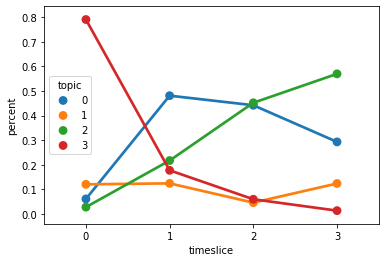

In [571]:
sns.pointplot(data = vis_df, x = 'timeslice', y = "percent", hue = 'topic')

From the plot, seems like before 1903, most non-fictions are about topic 3, which seems to be about love. However, topic about love went down throughout the years and became almost none by 1980. Topic 1 seems to be consistently not popular, but still persist through time. Topic 2 rises over time.